In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### General parameters

In [82]:
colors = ['blue', 'orange', 'green']

# Bootstrapping

In [58]:
def measure(data, chosen_measure):

    if chosen_measure == 'mean':
        return np.mean(data)
    if chosen_measure == 'std':
        return np.std(data)

def generate_bootstrap(n_vals_distribution, n_iterations_bootstrap, avg_dist, std, chosen_measure, sample_size = 'data_size', confidence_level = 0.95):
    """
    When the value of n_vals_distribution is set to a string such as 'infinite', samples
    for the bootstrap are taken from the distribution as a whole, otherwise we first take a sample from
    our distribution and afterwards we sample from that sample
    """
    # Generate sample data
    if type(n_vals_distribution) == int:
        data = np.random.normal(loc=avg_dist, scale=std, size=n_vals_distribution)
    
    if sample_size == 'data_size':
        sample_size = len(data)

    # Function to calculate the mean of a given sample

    # Perform bootstrapping
      # Size of each bootstrap sample
    bootstrap_vals = list()

    for _ in range(n_iterations_bootstrap):
        # Generate a bootstrap sample by sampling with replacement
        if type(n_vals_distribution) == int:
            bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)
        else:
            bootstrap_sample = np.random.normal(loc = avg_dist, scale = std, size = sample_size)
        
        # Calculate the mean of the bootstrap sample
        bootstrap_val = measure(bootstrap_sample, chosen_measure)
        
        # Store the bootstrap mean
        bootstrap_vals.append(bootstrap_val)

    # Calculate the confidence interval
    alpha = (1 - confidence_level) / 2
    lower_percentile = alpha * 100
    upper_percentile = (1 - alpha) * 100
    lower_bound = np.percentile(bootstrap_vals, lower_percentile)
    upper_bound = np.percentile(bootstrap_vals, upper_percentile)
    return bootstrap_vals, lower_bound, upper_bound 

## Calculating averages of the actual distribution

#### Selecting some parameters

In [55]:
n_vals_distribution = 'infinite'
n_iterations_bootstrap = 10 ** 4  # Number of bootstrap iterations
sample_sizes = [10, 100, 1000]
avg_dist = 10
std = 10
chosen_measure = 'mean'

# Select random seed
np.random.seed(42)

#### Run the experiment

In [56]:
dict_bootstrap_vals = dict()
dict_lower_bound = dict()
dict_upper_bound = dict()

for sample_size in sample_sizes:
    dict_bootstrap_vals[sample_size], dict_lower_bound[sample_size], dict_upper_bound[sample_size] =\
                    generate_bootstrap(n_vals_distribution, n_iterations_bootstrap, avg_dist, std, chosen_measure, sample_size = sample_size)

#### Display results

For 10 samples we found the CI [3.7133753515630805, 16.504795826987657].
For 100 samples we found the CI [8.036872346440713, 11.956439795885366].
For 1000 samples we found the CI [9.402978262664726, 10.606559815299237].


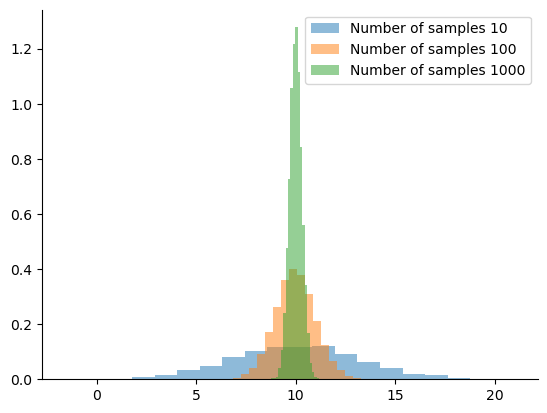

In [57]:
for sample_size in sample_sizes:
    bootstrap_vals = dict_bootstrap_vals[sample_size]
    lb = dict_lower_bound[sample_size]
    ub = dict_upper_bound[sample_size]

    print(f"For {sample_size} samples we found the CI [{lb}, {ub}].")
    plt.hist(bootstrap_vals, bins = 20, density = True, alpha = 0.5, label = f"Number of samples {sample_size}");

plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Calculating averages of a sample

#### Selecting some parameters for the test

In [33]:
n_vals_distributions = [10, 100, 1000]
n_iterations_bootstrap = 10 ** 5  # Number of bootstrap iterations
avg_dist = 10
std = 10
chosen_measure = 'mean'

# Select random seed
np.random.seed(42)

#### Run the experiment

In [36]:
dict_bootstrap_vals = dict()
dict_lower_bound = dict()
dict_upper_bound = dict()

for n_vals_distribution in n_vals_distributions:
    dict_bootstrap_vals[n_vals_distribution], dict_lower_bound[n_vals_distribution], dict_upper_bound[n_vals_distribution] =\
                    generate_bootstrap(n_vals_distribution, n_iterations_bootstrap, avg_dist, std, chosen_measure)

#### Visualize results

For 10 samples we found the CI [5.494257322768589, 10.537609416634476].
For 100 samples we found the CI [9.29627308303575, 13.16715631885891].
For 1000 samples we found the CI [9.78548383715757, 11.00754530665226].


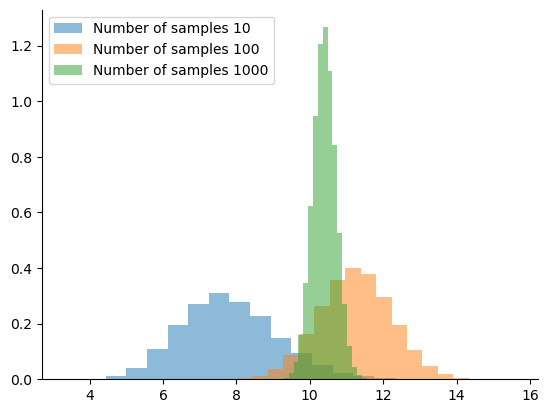

In [40]:
for n_vals_distribution in n_vals_distributions:
    bootstrap_vals = dict_bootstrap_vals[n_vals_distribution]
    lb = dict_lower_bound[n_vals_distribution]
    ub = dict_upper_bound[n_vals_distribution]

    print(f"For {n_vals_distribution} samples we found the CI [{lb}, {ub}].")
    plt.hist(bootstrap_vals, bins = 20, density = True, alpha = 0.5, label = f"Number of samples {n_vals_distribution}");

plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Computing Confidence intervals based on the central limit theorem

#### Selecting some parameters

In [67]:
sample_sizes = [10, 100, 1000]
avg_dist = 10
std = 10
xx = np.linspace(avg_dist - std, avg_dist + std, num = 10**4)

# Select random seed
np.random.seed(42)

#### Run the experiment

In [68]:
dict_pdf = dict()
dict_lower_bound = dict()
dict_upper_bound = dict()

for sample_size in sample_sizes:
    dict_lower_bound[sample_size] = norm.ppf(0.025, loc = avg_dist, scale = std / np.sqrt(sample_size))
    dict_upper_bound[sample_size] = norm.ppf(0.975, loc = avg_dist, scale = std / np.sqrt(sample_size))
    dict_pdf[sample_size] = norm.pdf(xx, loc = avg_dist, scale = std / np.sqrt(sample_size))

#### Visualize results

For 10 samples we found the CI [3.8020496769543835, 16.197950323045617].
For 100 samples we found the CI [8.040036015459945, 11.959963984540053].
For 1000 samples we found the CI [9.380204967695438, 10.619795032304562].


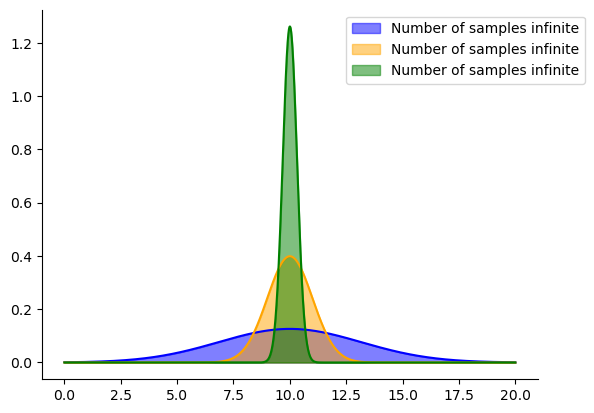

In [83]:
for sample_size, color in zip(sample_sizes, colors):
    pdf_vals = dict_pdf[sample_size]
    lb = dict_lower_bound[sample_size]
    ub = dict_upper_bound[sample_size]

    print(f"For {sample_size} samples we found the CI [{lb}, {ub}].")
    plt.plot(xx, pdf_vals, color=color)

    # Fill the area below the curve
    plt.fill_between(xx, pdf_vals, color=color, alpha=0.5, label = f"Number of samples {n_vals_distribution}")

plt.legend(bbox_to_anchor = (0.6, 1))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)